In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [159]:
# 假设数据存储在 'data.csv' 文件中，包含 "Request tokens" 列
# 加载数据
data = pd.read_csv('BurstGPT_1.csv')

# 过滤出 Model 为 'ChatGPT' 的行
filtered_data = data[
    (data['Model'] != 'ChatGPT') & 
    (data['Request tokens'] <= 4000) &
    (data['Response tokens'] != 0)]


filtered_data['Token Range'] = (filtered_data['Request tokens'] // 10) * 10

token_counts = filtered_data['Token Range'].value_counts().sort_index()

# 统计每个 request token 值出现的次数
# token_counts = request_tokens.value_counts().sort_index()
# 找到请求个数最高的两个区间
# highest_counts = token_counts.nlargest(2)
# print("Highest counts to be removed:", highest_counts)

# 去掉这两个最高的柱子
# token_counts = token_counts.drop(highest_counts.index)

# 计算 Request tokens 的众数和平均数
tokens_mode = filtered_data['Request tokens'].mode()[0]
tokens_mean = filtered_data['Request tokens'].mean()

/var/folders/1x/qwy97jbn4pb2k79b61ymwgtw0000gn/T/ipykernel_43280/3798069085.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Token Range'] = (filtered_data['Request tokens'] // 10) * 10


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


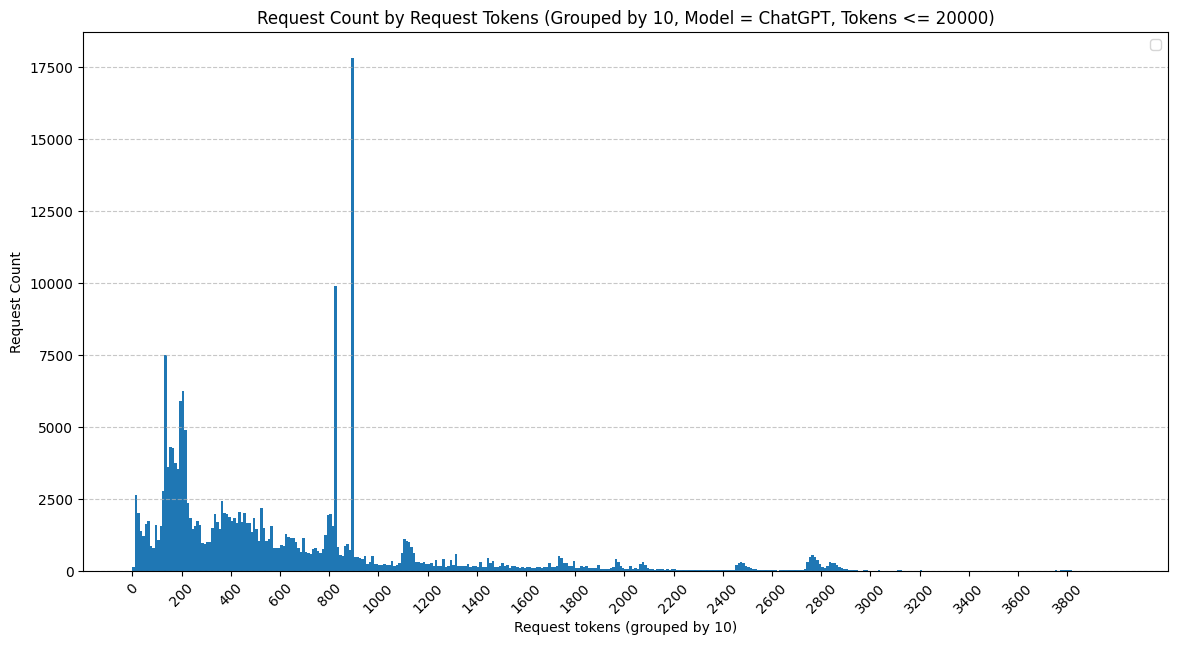

In [160]:
# 绘图
plt.figure(figsize=(14, 7))
plt.bar(token_counts.index, token_counts.values, width=10, align='edge')
plt.xlabel('Request tokens (grouped by 10)')
plt.ylabel('Request Count')
plt.title('Request Count by Request Tokens (Grouped by 10, Model = ChatGPT, Tokens <= 20000)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 自定义 x 轴的刻度，显示每 500 为一个刻度
plt.xticks(range(0, 4000, 200), rotation=45)

# # 添加众数和平均数的垂直线和标注
# plt.axvline(x=tokens_mode, color='r', linestyle='--', label=f'Mode: {tokens_mode}')
# plt.axvline(x=tokens_mean, color='g', linestyle='--', label=f'Mean: {tokens_mean:.2f}')

# 显示图例
plt.legend()

plt.show()

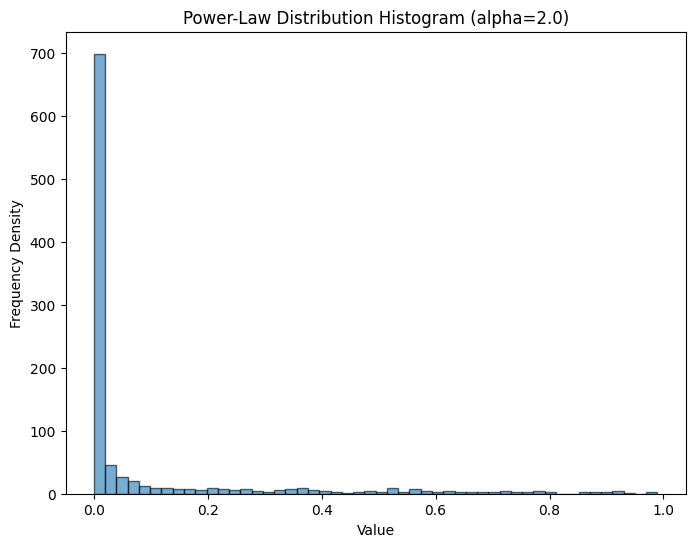

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate power-law distributed data
alpha = 0.1
total_requests = 1000
data = np.random.power(alpha, total_requests)

# Plotting histogram to show the distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=50, density=False, alpha=0.6, edgecolor='black')
plt.title('Power-Law Distribution Histogram (alpha=2.0)')
plt.xlabel('Value')
plt.ylabel('Frequency Density')
plt.show()


10 2048
1
Output Lens - Top 10 Most Common: [(99, 6), (33, 6), (74, 5), (84, 4), (164, 4), (155, 4), (15, 4), (144, 4), (13, 4), (25, 4)]
Output Lens - Top 10 Least Common: [(148, 1), (132, 1), (787, 1), (256, 1), (115, 1), (692, 1), (110, 1), (1116, 1), (406, 1), (765, 1)]
[(1, 2), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
[(10, 1), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (4, 1), (3, 1), (2, 2), (1, 2)]


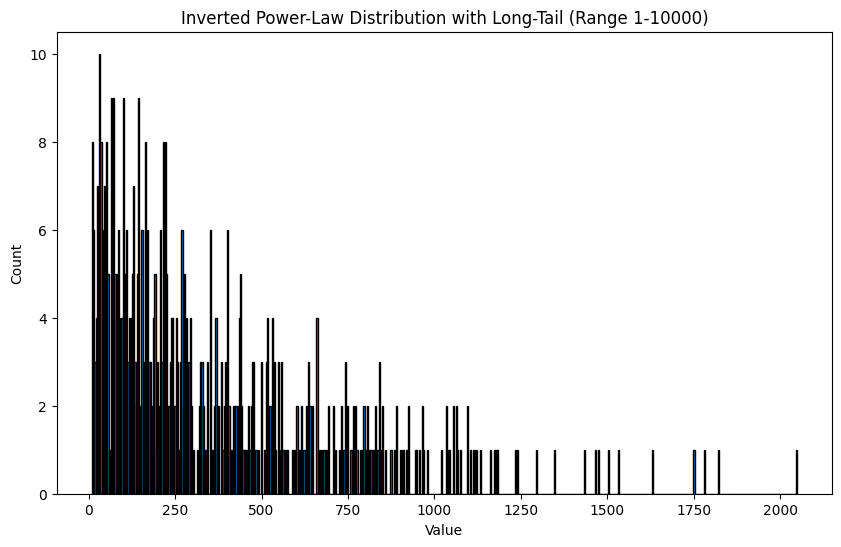

In [201]:
# Adjusting the distribution to create a long-tail effect with more small values
alpha = 1  # Power distribution parameter
total_requests = 600  # Number of data points

# Generate power-law distributed data in the range 0 to 1
data = np.random.power(alpha, total_requests)
# Invert the distribution to make smaller values more common in the scaled range
# The inversion is achieved by taking the reciprocal of the values and scaling them to the desired range
inverted_data = 1 - np.random.power(alpha, total_requests)  # Inverts values, making small numbers more frequent
scaled_inverted_data = inverted_data * (512 / inverted_data.max()) + 10  # Scale to the range 1 to 10000

alpha = 10  # Power distribution parameter
input_lens = 1 - np.random.power(alpha, total_requests)
scaled_inverted_data = np.floor(input_lens * (2038 / input_lens.max()) + 10).astype(int)

print(min(scaled_inverted_data), max(scaled_inverted_data))
from collections import Counter

output_counts = Counter(scaled_inverted_data)
print(output_counts[2048])
# 获取 input_lens 和 output_lens 中计数最多的前10个值和最少的后10个值
output_most_common = output_counts.most_common(10)  # 前10
output_least_common = output_counts.most_common()[:-11:-1]  # 后10
print("Output Lens - Top 10 Most Common:", output_most_common)
print("Output Lens - Top 10 Least Common:", output_least_common)
# for i in range(len(scaled_inverted_data)):
#     print(scaled_inverted_data[i])

test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2]
test = Counter(test)
print(test.most_common(10))
print(test.most_common()[:-11:-1])

# Plot the adjusted distribution
plt.figure(figsize=(10, 6))
plt.hist(scaled_inverted_data, density=False, bins=600, edgecolor='black')
plt.title('Inverted Power-Law Distribution with Long-Tail (Range 1-10000)')
plt.xlabel('Value')
plt.ylabel('Count')
# 自定义 x 轴的刻度，显示每 500 为一个刻度
# plt.xticks(range(0, 4000, 200), rotation=45)
plt.show()


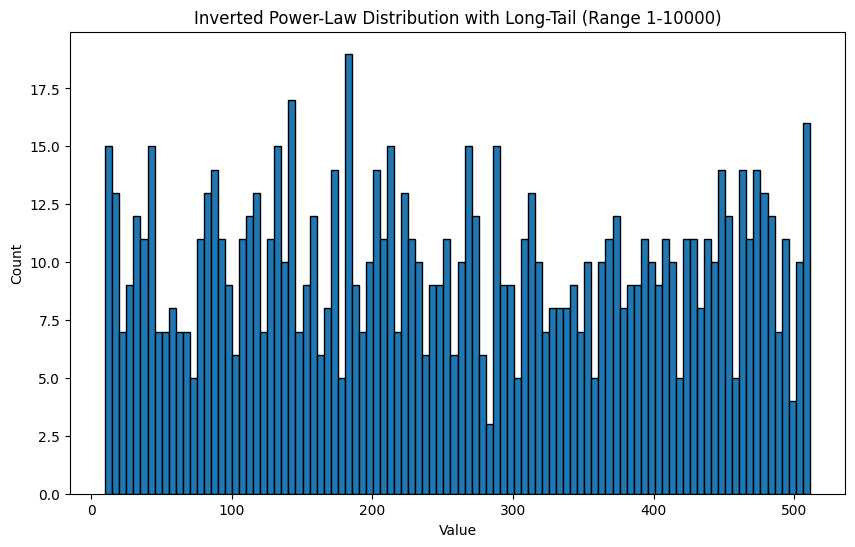

In [154]:
input_range = [10, 512]
output_range = [10, 512]
input_lens = np.random.randint(input_range[0], input_range[1], total_requests)
output_lens = np.random.randint(output_range[0], output_range[1], total_requests)

# Plot the adjusted distribution
plt.figure(figsize=(10, 6))
plt.hist(input_lens, density=False, bins=100, edgecolor='black')
plt.title('Inverted Power-Law Distribution with Long-Tail (Range 1-10000)')
plt.xlabel('Value')
plt.ylabel('Count')
# 自定义 x 轴的刻度，显示每 500 为一个刻度
# plt.xticks(range(0, 4000, 200), rotation=45)
plt.show()

Input Lens - Top 10 Most Common: [(70, 5), (437, 4), (59, 4), (56, 4), (55, 4), (68, 4), (119, 4), (22, 4), (254, 3), (117, 3)]
Input Lens - Top 10 Least Common: [(143, 1), (1077, 1), (505, 1), (671, 1), (705, 1), (76, 1), (948, 1), (618, 1), (548, 1), (944, 1)]
Output Lens - Top 10 Most Common: [(172, 6), (28, 4), (454, 4), (150, 4), (195, 4), (51, 4), (41, 4), (208, 4), (260, 4), (42, 3)]
Output Lens - Top 10 Least Common: [(167, 1), (176, 1), (467, 1), (206, 1), (255, 1), (632, 1), (96, 1), (527, 1), (33, 1), (426, 1)]


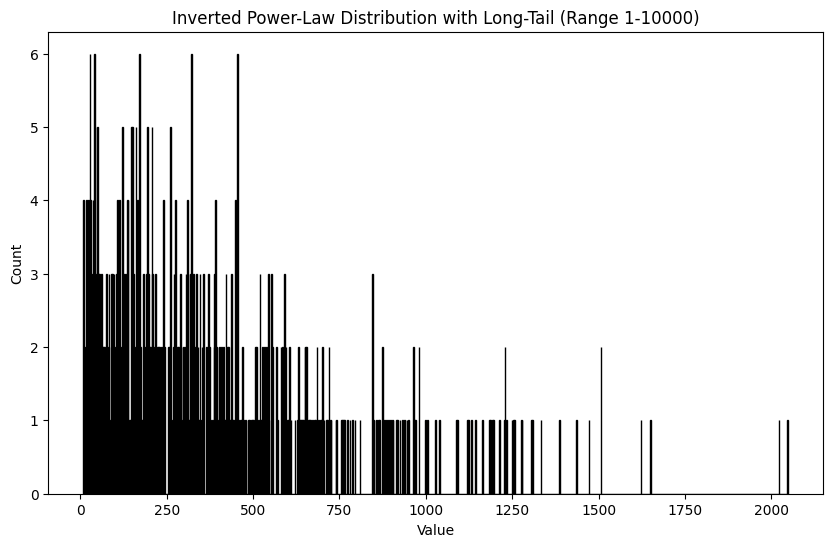

In [206]:
tot_req = 600
alpha = 10.0  # Power distribution parameter
input_lens = 1 - np.random.power(alpha, tot_req)
input_lens = np.round(input_lens * (2040 / input_lens.max()) + 8).astype(int)
output_lens = 1 - np.random.power(alpha, tot_req)
output_lens = np.round(output_lens * (2040 / output_lens.max()) + 8).astype(int)
from collections import Counter
# 对 input_lens 和 output_lens 进行计数
input_counts = Counter(input_lens)
output_counts = Counter(output_lens)
# 获取 input_lens 和 output_lens 中计数最多的前10个值和最少的后10个值
input_most_common = input_counts.most_common(10)  # 前10
input_least_common = input_counts.most_common()[:-11:-1]  # 后10
output_most_common = output_counts.most_common(10)  # 前10
output_least_common = output_counts.most_common()[:-11:-1]  # 后10
# 打印结果
print("Input Lens - Top 10 Most Common:", input_most_common)
print("Input Lens - Top 10 Least Common:", input_least_common)
print("Output Lens - Top 10 Most Common:", output_most_common)
print("Output Lens - Top 10 Least Common:", output_least_common)

# Plot the adjusted distribution
plt.figure(figsize=(10, 6))
plt.hist(output_lens, density=False, bins=1000, edgecolor='black')
plt.title('Inverted Power-Law Distribution with Long-Tail (Range 1-10000)')
plt.xlabel('Value')
plt.ylabel('Count')
# 自定义 x 轴的刻度，显示每 500 为一个刻度
# plt.xticks(range(0, 4000, 200), rotation=45)
plt.show()

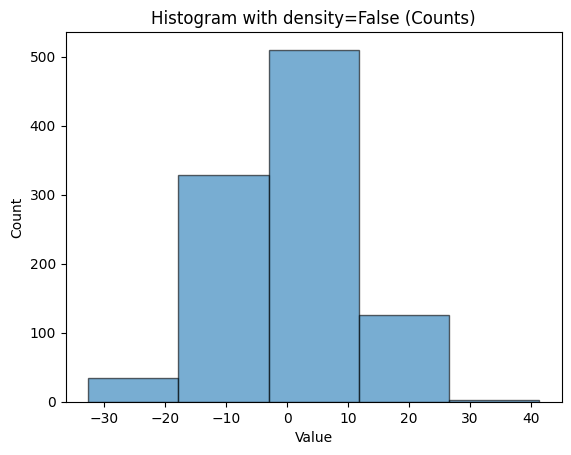

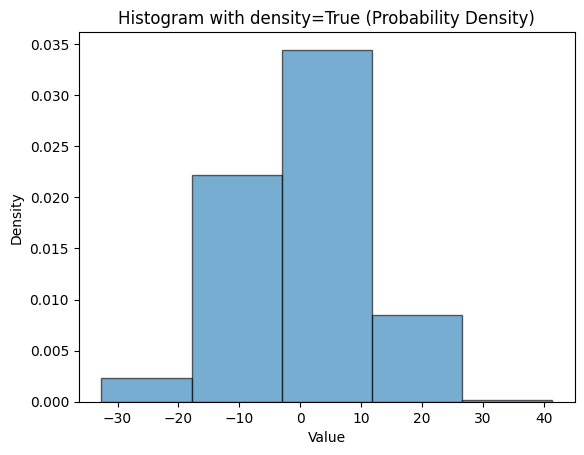

In [134]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.normal(0, 10, 1000)

# density=False，表示每个区间的频数
plt.hist(data, bins=5, density=False, alpha=0.6, edgecolor='black')
plt.title('Histogram with density=False (Counts)')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

# density=True，表示每个区间的频率密度
plt.hist(data, bins=5, density=True, alpha=0.6, edgecolor='black')
plt.title('Histogram with density=True (Probability Density)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


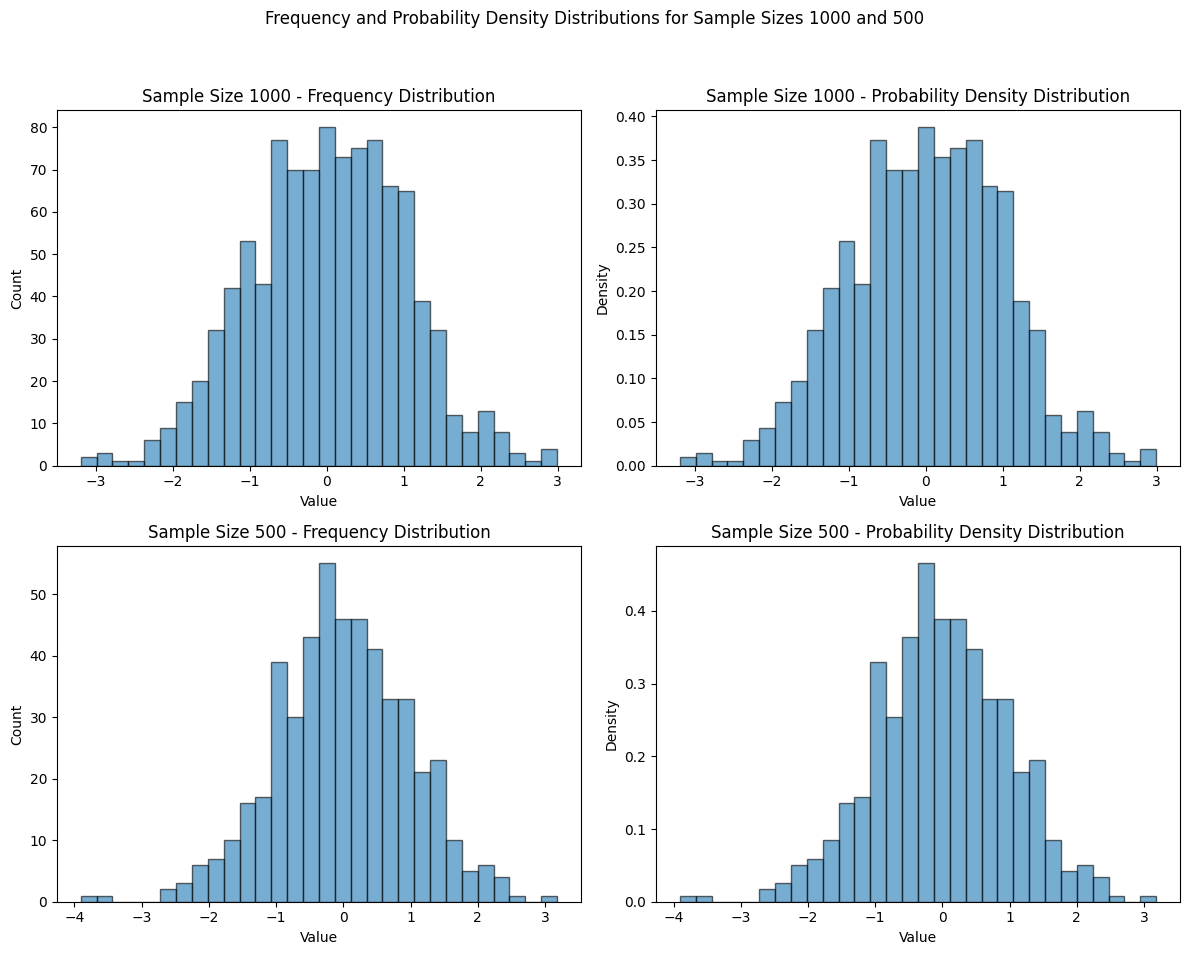

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Generate two data sets with different sample sizes
data_1000 = np.random.normal(0, 1, 1000)  # Sample size 1000, normal distribution
data_500 = np.random.normal(0, 1, 500)    # Sample size 500, normal distribution

# Create subplots for four histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Frequency and Probability Density Distributions for Sample Sizes 1000 and 500")

# Plot 1000 sample size - Frequency distribution (density=False)
axes[0, 0].hist(data_1000, bins=30, density=False, alpha=0.6, edgecolor='black')
axes[0, 0].set_title("Sample Size 1000 - Frequency Distribution")
axes[0, 0].set_xlabel("Value")
axes[0, 0].set_ylabel("Count")

# Plot 1000 sample size - Probability density distribution (density=True)
axes[0, 1].hist(data_1000, bins=30, density=True, alpha=0.6, edgecolor='black')
axes[0, 1].set_title("Sample Size 1000 - Probability Density Distribution")
axes[0, 1].set_xlabel("Value")
axes[0, 1].set_ylabel("Density")

# Plot 500 sample size - Frequency distribution (density=False)
axes[1, 0].hist(data_500, bins=30, density=False, alpha=0.6, edgecolor='black')
axes[1, 0].set_title("Sample Size 500 - Frequency Distribution")
axes[1, 0].set_xlabel("Value")
axes[1, 0].set_ylabel("Count")

# Plot 500 sample size - Probability density distribution (density=True)
axes[1, 1].hist(data_500, bins=30, density=True, alpha=0.6, edgecolor='black')
axes[1, 1].set_title("Sample Size 500 - Probability Density Distribution")
axes[1, 1].set_xlabel("Value")
axes[1, 1].set_ylabel("Density")

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()